In [3]:
import networkx as nx
import csv
import math
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
G = nx.DiGraph()
#print(G.nodes)
with open('Straßengraph/edges_lux.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    count=0
    for row in spamreader:        
        if(bool(list(row)[6])==True):#forward=True
            G.add_edge(int(list(row)[1]), int(list(row)[2]))
            #WEprint(int(list(row)[1]), int(list(row)[2]))
        if(bool(list(row)[7])==True):#forward=True
            G.add_edge(int(list(row)[2]), int(list(row)[1]))
        if count>3:
            break
        #count+=1
#spamreader[0]

# Import the Graph
Import the Graph with all necessary arguments like the coordinates of the nodes, the speed and the direction.

In [5]:
G3 = nx.DiGraph()
with open('Straßengraph/edges_lux.csv', newline='') as csvfile:
    with open('Straßengraph/coordinates_lux.csv', newline='') as coordinates:    
        spamreader = csv.reader(csvfile, delimiter=';')
        cooreader = csv.reader(coordinates, delimiter=';')
        count=0
        coorrows = list(cooreader)
        for row in spamreader:        
            Id,u,v,length,maxspeed, maxspeedtrucks, IsF, IsB=row
            #print(type(Id))
            #print(Id)
            #interestingrows=[row for idx, row in enumerate(cooreader) if idx ==int(Id)]
            #interestingrows=[row2 for idx, row2 in enumerate(cooreader) if idx ==2]
            #print(coorrow[int(Id)])
            coorrow=coorrows[int(Id)]
            #length_of_coorrow=len(coorrow[int(Id)])
            #print(interestingrows)
            if(IsF):#forward=True
            #print(length1)
                G3.add_node(u,y=coorrow[1],x=coorrow[2])
                G3.add_node(v,y=coorrow[-2],x=coorrow[-1])
                G3.add_edge(u,v,length=int(length),maxspeed=float(maxspeed),maxspeedtrucks=float(maxspeedtrucks),
                            y1=coorrow[1],x1=coorrow[2],y2=coorrow[-2],x2=coorrow[-1])
            #WEprint(int(list(row)[1]), int(list(row)[2]))
            if(IsB):#forward=True
                G3.add_node(u,y=coorrow[1],x=coorrow[2])
                G3.add_node(v,y=coorrow[-2],x=coorrow[-1])
                G3.add_edge(v,u,length=int(length),maxspeed=float(maxspeed),maxspeedtrucks=float(maxspeedtrucks),
                           y1=coorrow[1],x1=coorrow[2],y2=coorrow[-2],x2=coorrow[-1])
            #count+=1
            #if count>3:
            #    break

In [4]:
print(len(list(G3.nodes())))
print(len(list(G3.edges())))

58858
137380


Der Graph hat 58858 Knoten und 137380 Kanten

In [6]:
coor=nx.get_node_attributes(G3,"y")
print((coor)["2"])

49.57622


# Use Dijkstra  and Astar for the Graph

## Dijkstra

In [8]:
nx.dijkstra_path(G3, '1', '11549', weight='length')

['1',
 '11458',
 '11237',
 '11637',
 '11636',
 '1078',
 '7750',
 '7749',
 '54301',
 '117',
 '116',
 '9582',
 '7117',
 '49743',
 '60654',
 '11715',
 '60262',
 '60574',
 '60175',
 '60277',
 '59722',
 '13231',
 '14621',
 '13727',
 '13726',
 '15189',
 '9766',
 '61136',
 '60605',
 '51225',
 '51224',
 '46334',
 '46331',
 '56416',
 '11901',
 '9',
 '731',
 '47312',
 '47311',
 '11616',
 '64',
 '67',
 '51892',
 '13552',
 '58001',
 '32',
 '11447',
 '11526',
 '11227',
 '7578',
 '7576',
 '45573',
 '18635',
 '11022',
 '7302',
 '64005',
 '53380',
 '64114',
 '11226',
 '11749',
 '54136',
 '46327',
 '45029',
 '44944',
 '44943',
 '12340',
 '52119',
 '49055',
 '41354',
 '10964',
 '64276',
 '11528',
 '8227',
 '5434',
 '12245',
 '16820',
 '44234',
 '43251',
 '41080',
 '44341',
 '11223',
 '8357',
 '40713',
 '40714',
 '5767',
 '64315',
 '5766',
 '15556',
 '17131',
 '59313',
 '17129',
 '41969',
 '12273',
 '11196',
 '12847',
 '62421',
 '41037',
 '61932',
 '40199',
 '56592',
 '38605',
 '16403',
 '62476',
 '38371

## Astar

In [6]:
coory=nx.get_node_attributes(G3,"y")
coorx=nx.get_node_attributes(G3,"x")
def dist(a, b):
    x1=float(coorx[a])
    x2=float(coorx[b])
    y1=float(coory[a])
    y2=float(coory[b])
    return(math.sqrt(((x1-x2)*71)**2+((y1-y2)*111)**2)*1000*100)
    #return(math.sqrt((x1-x2)**2+(y1-y2)**2))   

In [10]:
dist("1","32")

<class 'dict'>



183920.33622275855

In [7]:
start_time=time.time()
nx.astar_path(G3, "1", "32", heuristic=dist, weight='length')
end_time=time.time()
print(end_time-start_time)

0.001379251480102539


In [8]:
start_time = time.time()
nx.dijkstra_path(G3, '1', '32', weight='length')
end_time = time.time()
print(end_time-start_time)

0.003360271453857422


## Dijkstra vs Astar

In [23]:
nodes_of_G3=list(G3.nodes)
rand_num=[]
for i in range(200):
    rand_num.append(str(random.randrange(len(nodes_of_G3))))
    ## Problem möglich da dies Somit erzeugt Zahlen nicht zwangsläufig als Knoten im Graphen vorzufinden sind
rand_num
#print(rand_num)
dijkstra_times=[]
Astar_times=[]
i=0
while(i<198):
    i+=1
    node1=rand_num[i]
    node2=rand_num[i+1]
    try:
        start_time = time.time()
        nx.dijkstra_path(G3, node1, node2, weight='length')
        end_time = time.time()
        dijkstra_times.append(end_time-start_time)
    
        start_time=time.time()
        nx.astar_path(G3, node1, node2, heuristic=dist, weight='length')
        end_time=time.time()
        Astar_times.append(end_time-start_time)
    except:
        print("Problem",node1,node2,i)
        continue
    
#print(dijkstra_times)
#print(Astar_times)

Problem 35338 36630 5
Problem 36630 984 6
Problem 24190 15761 10
Problem 15761 33258 11
Problem 39950 9938 16
Problem 9938 44579 17
Problem 13554 28122 20
Problem 28122 46194 21
Problem 45642 42068 41
Problem 42068 14556 42
Problem 6148 9373 51
Problem 9373 23817 52
Problem 36667 31041 60
Problem 31041 32754 61
Problem 46083 49446 67
Problem 49446 18515 68
Problem 21911 53362 75
Problem 53362 8632 76
Problem 35945 14414 84
Problem 14414 35874 85
Problem 38678 47509 90
Problem 47509 36970 91
Problem 33151 56200 96
Problem 56200 24428 97
Problem 20743 16722 112
Problem 16722 54465 113
Problem 18902 19965 116
Problem 19965 32930 117
Problem 32930 8114 118
Problem 8114 56036 119
Problem 24212 56201 124
Problem 56201 20872 125
Problem 20872 7571 126
Problem 30197 13440 133
Problem 13440 52066 134
Problem 52066 7329 135
Problem 7855 3253 152
Problem 3253 33086 153
Problem 9834 25630 162
Problem 25630 18154 163
Problem 21501 40451 169
Problem 40451 41335 170
Problem 29025 29910 175
Problem 29

In [27]:
#for i in range(10):
    #print (i)
    #print(float(dijkstra_times[i])-float(Astar_times[i]))
number_times=len(dijkstra_times)
mean_of_speedup=0
max_speedup=0
min_speedup=100
for i in range(number_times):
    quot=dijkstra_times[i]/Astar_times[i]
    mean_of_speedup+=quot
    if quot>max_speedup:
        max_speedup=quot
    if quot<min_speedup:
        min_speedup=quot
mean_of_speedup/=number_times
print("The mean of the speedup in this examples is deteced threw",mean_of_speedup)
print("The Maximum speed is detected by: ",max_speedup)
print("The Maximum speed is detected by: ",min_speedup)

The mean of the speedup in this examples is deteced threw 6.130144808270255
The Maximum speed is detected by:  74.8954164965292
The Maximum speed is detected by:  1.4696907216494846


You can see that for different nodes in the graph, the shortest Path Algortithm with Astar is between 3 and 11 times faster the Algorithm from dijkstra.

## Try Calculation with Landmarks


### Random Landmarks

In [10]:
nodelist=list(G.nodes())
random.seed(42) #Erforderlich, um das Ergebnis Reproduzieren zu können
num_random_nodes=5
random_Landmarks=random.sample(nodelist,k=num_random_nodes)#Sample ohne wiederholung, Bei random.choices wäre Wiederholung möglich
print(random_Landmarks)
path_1=nx.dijkstra_path(G3, str(random_Landmarks[0]), '16625', weight='length')
#path_1[0]
lengths_of_edges=nx.get_edge_attributes(G3,"length")
lengths_of_edges[(path_1[0],path_1[1])]#Gibt Länge zwischen Knoten in path_1[0] und path_1[1] auf

[32103, 35004, 6919, 51622, 27322]


11743

In [11]:
lengths_of_edges=nx.get_edge_attributes(G3,"length")
def length_of_path(path):
    num_nodes_in_path=len(path)
    length_in_cm=0
    for i in range(num_nodes_in_path-1):
        length_in_cm+=lengths_of_edges[path[i],path[i+1]]
    return length_in_cm

In [20]:
length_of_path(path_1)

2421215

In [ ]:
Landmarks_computed_now=False

In [8]:
num_nodes=len(list(G.nodes()))
nodestomessure=num_nodes
#nodestomessure=7 # Testmode
#Dauert sehr lang
# Gibt Anzhal an nodes aus
#Erstelle Distance-Matrix mit Random_nodes in Spalten, nodes in Zeilen
dist_landmarks=[[] for _ in range(num_random_nodes)]
#print(dist_landmarks[1][2])
#dist_landmarks[3*num_nodes+2] um Eintrag von Node 4 zu 3 zu erhalten
for i in range(num_random_nodes):
    for j in range(nodestomessure):
        try:
            #curr_path=nx.dijkstra_path(G3, str(random_Landmarks[i]), str(nodelist[j]), weight='length')
            #besser Berechnung mit Astar, da diese etwas schneller geht
            curr_path=nx.astar_path(G3, str(random_Landmarks[i]), str(nodelist[j]), weight='length',heuristic=dist)
            dist_landmarks[i].append(length_of_path(curr_path))
            #print(dist_landmarks[i*num_nodes+j])
            #print(i,j)
        except:
            #continue
            dist_landmarks[i].append(-1) ##tbd, -1 ist sehr schlecht, weil Algorithmus dann diesen Pfad benutzen will
            print("problem")
            print(i,j)
Landmarks_computed_now=True

problem
0 36557
problem
0 36558
problem
0 36559
problem
0 40365
problem
0 40366
problem
0 40367
problem
0 43863
problem
0 43864
problem
0 47529
problem
0 47530
problem
0 47677
problem
0 47678
problem
0 47679
problem
0 48914
problem
0 48915
problem
0 48916
problem
0 52125
problem
0 52126
problem
0 52609
problem
0 52610
problem
0 52611
problem
0 52974
problem
0 55363
problem
0 55364
problem
0 55365
problem
0 55366
problem
0 55367
problem
0 55368
problem
0 55369
problem
0 55370
problem
0 55375
problem
0 55376
problem
0 55382
problem
0 55383
problem
0 55464
problem
0 55465
problem
0 55466
problem
0 55467
problem
0 55475
problem
0 55476
problem
0 55492
problem
0 55493
problem
0 55504
problem
0 55506
problem
0 55522
problem
0 55625
problem
0 55629
problem
0 55630
problem
0 55631
problem
0 55638
problem
0 55639
problem
0 55655
problem
0 55660
problem
0 55663
problem
1 36557
problem
1 36558
problem
1 36559
problem
1 40365
problem
1 40366
problem
1 40367
problem
1 43863
problem
1 43864
problem


In [32]:
print(dist_landmarks)

[[2444905, 2438110, 2435876, 2447231, 2435448, 2441814, 2665789], [2362123, 2355328, 2353094, 2364449, 2352666, 2359032, 2583007], [617692, 610897, 608663, 620018, 608235, 614601, 792497], [398713, 391727, 407742, 396387, 394389, 388023, 613442], [2917738, 2910943, 2908709, 2920064, 2908281, 2914647, 3092543]]


## Export these values to a CSV File

In [9]:
if(Landmarks_computed_now):
    with open ('Landmarks_distances.csv','w',newline = '') as csvfile:
        my_writer = csv.writer(csvfile, delimiter = ';')
        my_writer.writerows(dist_landmarks)
    

## Load these values from the CSV File

In [20]:
loaded_Landmarks_distances=[]
with open('Landmarks_distances.csv', newline= '') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
        loaded_Landmarks_distances.append([int(list(row)[i]) for i in range(len(list(row)))])
        #loaded_Landmarks_distances.append(list(row))
print(loaded_Landmarks_distances)

[[2444905, 2438110, 2435876, 2447231, 2435448, 2441814, 2665789, 2676086, 2648482, 2677921, 2458486, 2467448, 2449788, 2450874, 2384189, 2392048, 2382705, 2389160, 2374746, 2294688, 2292563, 2293855, 2294688, 2294996, 2291457, 2288467, 2291457, 2286103, 2292516, 2463161, 2469002, 2461746, 2474843, 2471001, 2466219, 2475554, 2499744, 2493740, 2506194, 2505097, 2518235, 2505831, 2521576, 2527557, 2540644, 2533577, 2520895, 2533507, 2549827, 2531186, 2506443, 2500158, 2500158, 2500158, 2514843, 2503119, 2504491, 2505627, 2491480, 2512733, 2466439, 2470054, 2457601, 2459040, 2474546, 2476869, 2467209, 2527558, 2517177, 2533466, 2536748, 2541769, 2538989, 2392274, 2394516, 2395910, 2398581, 2385707, 2401793, 2380855, 2407266, 2398631, 2310516, 2314901, 2314901, 2313542, 2303675, 2322985, 2311802, 2314901, 2314038, 2305633, 2315938, 2316839, 2294110, 2307781, 2324267, 2326794, 2318544, 2328862, 2329630, 2314287, 2397970, 2404946, 2484969, 2482875, 2488872, 2492105, 2479343, 2475114, 2643799,

In [55]:
#print(random_Landmarks)
def dist_to_landmark_min(random_Landmarks=random_Landmarks,loaded_Landmarks_distances=loaded_Landmarks_distances,u=nodes_of_G3[0],v=nodes_of_G3[1]):##work with Astar, therefor nodes from G3 which are strings
    index_u=nodes_of_G3.index(u)
    index_v=nodes_of_G3.index(v)
    dist_to_landmark_u=loaded_Landmarks_distances[0][index_u]
    dist_to_landmark_v=loaded_Landmarks_distances[0][index_v]
    #print("Die debug nodes sind:",nodes_of_G3[index_u],nodes_of_G3[index_v])
    #print("Die Indexe sind",index_u,index_v)
    noproblem_u=True
    noproblem_v=True
    if(dist_to_landmark_u<0):##In the Dataset, edges have weight zero, if there is no path
                            #That would cause, that the algorithm would calculated short distance to unreachable nodes
        dist_to_landmark_u=100000000
        noproblem_u=False
    if(dist_to_landmark_v<0):
        dist_to_landmark_v=100000000
        noproblem_v=False
    
    trian=0
    if(noproblem_u and noproblem_v):
        trian=abs(dist_to_landmark_u-dist_to_landmark_v)
    for i in range (1,len(random_Landmarks)):
        noproblem_u=True
        noproblem_v=True    
        dist_to_landmark_u=loaded_Landmarks_distances[i][index_u]
        dist_to_landmark_v=loaded_Landmarks_distances[i][index_v]
        if(dist_to_landmark_u<0):
            dist_to_landmark_u=100000000
            noproblem_u=False
        if(dist_to_landmark_v<0):
            dist_to_landmark_v=100000000
            noproblem_v=False
        currtrian=abs(dist_to_landmark_u-dist_to_landmark_v)##Problem, there should be side distances to landmarks
        if currtrian>trian and noproblem_u and noproblem_v:#> statt < da der Algorithmus die größte Absch#tzung finden soll
            trian=currtrian
    return trian

[32103, 35004, 6919, 51622, 27322]


In [2]:
def trian_dist_for_a_star(u,v):
    return dist_to_landmark_min(u=u,v=v)
## You have to do this, because Astar can only work with heuristic, which has u,v as only input values

In [33]:
astar_42_69=nx.astar_path(G3, str(nodes_of_G3[42]), str(nodes_of_G3[69]), weight='length',heuristic=dist)
length_of_path(astar_42_69)

91280

In [52]:
for i in range(5):
    print(loaded_Landmarks_distances[i][42],loaded_Landmarks_distances[i][69])
    print(loaded_Landmarks_distances[i][42]-loaded_Landmarks_distances[i][69])

2521576 2533466
-11890
2438794 2450684
-11890
509926 473384
36542
638145 729425
-91280
2809972 2773430
36542


# Passen die Distanzen in der Matrix?

In [24]:
print(length_of_path( nx.astar_path(G3, str(random_Landmarks[4]), str(nodelist[6345]), weight='length',heuristic=dist)))
print(loaded_Landmarks_distances[4][6345])

2209670
2209670


In [22]:
dist_landmarks[1]
num_nodes

58858

In [ ]:
print(nx.astar_path(G3, str(42), str(69), weight='length',heuristic=dist))
print(nx.astar_path(G3, str(42), str(69), weight='length',heuristic=dist))

In [78]:
curr_path=nx.dijkstra_path(G3, str(random_Landmarks[0]), str(nodelist[1]), weight='length')

## Problem mit schlechten Landmarks

Mit schlechten Landmarks ist es durchaus möglich, dass die Abschätzung "geringer" ist als die euklidische Norm, man stelle sich ein gleichschenkliches Dreieck vor

In [57]:
#print(astar_dist_42_69==astar_land_42_69)
random.seed=69420
all_correct=True
random_nodes=random.sample(nodes_of_G3,k=5)
for node_1 in random_nodes:
    for node_2 in random_nodes:
        if node_1!=node_2 and all_correct:
            try:
                astar_landmark=nx.astar_path(G3, node_1, node_2, heuristic=trian_dist_for_a_star, weight='length')
                astar_dist=nx.astar_path(G3, node_1, node_2, heuristic=dist, weight='length')
                if(astar_landmark!=astar_dist):
                    all_correct=False
                    print("Falsches Ergebnis mit", node_1,node_2)
                else:
                    print("richtiges Ergebnis mit", node_1,node_2)
            except:
                continue
print(all_correct)

richtiges Ergebnis mit 56202 41523
richtiges Ergebnis mit 56202 65591
richtiges Ergebnis mit 56202 23429
richtiges Ergebnis mit 56202 35510
richtiges Ergebnis mit 41523 56202
richtiges Ergebnis mit 41523 65591
richtiges Ergebnis mit 41523 23429
richtiges Ergebnis mit 41523 35510
Falsches Ergebnis mit 65591 56202
False


In [ ]:
##The result ist wrong, because of two paths with the exact same length. Later in the code we checked the same with comparing
##the length of the path instead. 

In [58]:
def max_landmark_and_dist(u,v):
    l1=dist_to_landmark_min(u=u,v=v)
    l2=dist(u,v)
    return(max(l1,l2))

In [103]:
#print(astar_dist_42_69==astar_land_42_69)
#set.seed(69420)
all_correct=True
random_nodes=random.sample(nodes_of_G3,k=5)
for node_1 in random_nodes:
    for node_2 in random_nodes:
        if node_1!=node_2 and all_correct:
            try:
                astar_landmark=nx.astar_path(G3, node_1, node_2, heuristic=max_landmark_and_dist, weight='length')
                astar_dist=nx.astar_path(G3, node_1, node_2, heuristic=dist, weight='length')
                l1=length_of_path(astar_landmark)
                l2=length_of_path(astar_dist)
                if(l1!=l2):
                    all_correct=False
                    print("Falsches Ergebnis mit", node_1,node_2)
                else:
                    print("richtiges Ergebnis mit", node_1,node_2)
            except:
                continue
print(all_correct)

richtiges Ergebnis mit 12289 57367
richtiges Ergebnis mit 12289 28286
richtiges Ergebnis mit 12289 23605
richtiges Ergebnis mit 12289 12458
richtiges Ergebnis mit 57367 12289
richtiges Ergebnis mit 57367 28286
richtiges Ergebnis mit 57367 23605
richtiges Ergebnis mit 57367 12458
richtiges Ergebnis mit 28286 12289
richtiges Ergebnis mit 28286 57367
richtiges Ergebnis mit 28286 23605
richtiges Ergebnis mit 28286 12458
richtiges Ergebnis mit 23605 12289
richtiges Ergebnis mit 23605 57367
richtiges Ergebnis mit 23605 28286
richtiges Ergebnis mit 23605 12458
richtiges Ergebnis mit 12458 12289
richtiges Ergebnis mit 12458 57367
richtiges Ergebnis mit 12458 28286
richtiges Ergebnis mit 12458 23605
True


## Print the Graph


In [104]:
coory=nx.get_node_attributes(G3,"y")
coory['12287']
print(list(G.edges)[1:5])
print(list(G.edges)[1][1])
print(coory[str(list(G.edges)[1][1])])
print(coorx[str(list(G.edges)[1][1])])

[(0, 46553), (0, 11896), (1, 0), (1, 11458)]
46553
49.58949
6.105028


<function matplotlib.pyplot.show(close=None, block=None)>

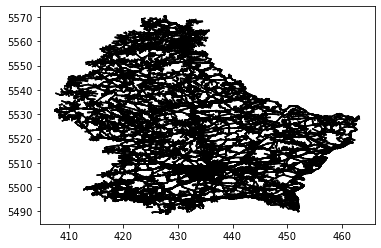

In [117]:
edgelist=list(G.edges)
for i in range(len(edgelist)):
#for i in range(10000):
    node1=edgelist[i][0]
    node2=edgelist[i][1]
    x=[coorx[str(node1)],coorx[str(node2)]]
    y=[coory[str(node1)],coory[str(node2)]]
    x[0]=float(x[0])*71
    x[1]=float(x[1])*71
    y[0]=float(y[0])*111
    y[1]=float(y[1])*111
    plt.plot(x,y,color='black')
plt.show

In [112]:
coorx[str(node1)]

'6.103909'

In [123]:
speed=nx.get_edge_attributes(G3,"maxspeed")
speed[('0', '46553')]

0.7222222

<function matplotlib.pyplot.show(close=None, block=None)>

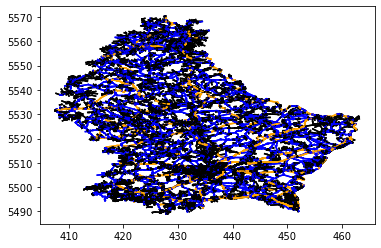

In [140]:
edgelist=list(G.edges)
for i in range(len(edgelist)):
#for i in range(100):
    node1=edgelist[i][0]
    node2=edgelist[i][1]
    x=[coorx[str(node1)],coorx[str(node2)]]
    y=[coory[str(node1)],coory[str(node2)]]
    x[0]=float(x[0])*71
    x[1]=float(x[1])*71
    y[0]=float(y[0])*111
    y[1]=float(y[1])*111
    currspeed=math.floor(speed[(str(node1),str(node2))])
    #random.seed(currspeed)
    #print(currspeed)
    if currspeed<1:
        #plt.plot(x,y,color=("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])))
        plt.plot(x,y,color='black')
    if currspeed<2 and currspeed>=1:
            plt.plot(x,y,color='blue')
    if currspeed>=2:
        plt.plot(x,y,color='orange')
plt.show